# Mean Reversion Trading Algorithm
* Trading strategy that focuses on when a security moves "too" far away from a 21 moving average
* General idea is that it will move back toward the mean 

In [83]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
from datetime import datetime, timedelta
import seaborn as sb
import math
from pushsafer import Client
sb.set()
import base64
import io


In [84]:
import yfinance as yf

In [85]:
#stock = pd.DataFrame(pdr.get_data_yahoo(Ticker, datetime(2022,1,1))['Close'])
Ticker= "SOXS"
stock = yf.download('SOXS',start="2022-01-01")

[*********************100%***********************]  1 of 1 completed


In [86]:
stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,33.700001,34.000000,32.200001,32.200001,31.810158,2154690
2022-01-04,31.900000,34.900002,31.200001,32.599998,32.205315,3468330
2022-01-05,33.400002,35.900002,32.400002,35.799999,35.366573,3804420
2022-01-06,36.000000,37.099998,34.500000,34.900002,34.477470,3411860
2022-01-07,35.200001,38.400002,34.700001,38.000000,37.539940,3151280
...,...,...,...,...,...,...
2023-05-09,20.559999,20.980000,20.480000,20.740000,20.740000,20312100
2023-05-10,20.049999,20.750000,19.670000,20.120001,20.120001,30291700
2023-05-11,20.100000,21.100000,20.000000,20.510000,20.510000,23605200


In [87]:
ma = 21
stock['returns'] = np.log(stock["Close"]).diff()
stock['ma'] = stock['Close'].rolling(ma).mean().shift()
stock['ratio'] = stock['Close'] / stock['ma']

In [88]:
stock['ratio'].describe()

count    322.000000
mean       0.981502
std        0.177936
min        0.544684
25%        0.845429
50%        0.982133
75%        1.108348
max        1.392149
Name: ratio, dtype: float64

In [89]:
percentiles = [9, 50, 89]
p = np.percentile(stock['ratio'].dropna(), percentiles)

p[0]

0.7256115056386541

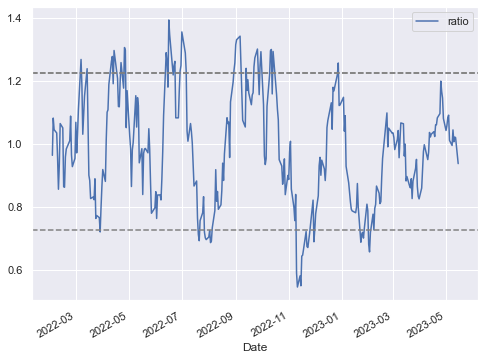

In [90]:
stock['ratio'].dropna().plot(legend = True)
plt.axhline(p[0], c= (.5,.5,.5), ls='--')
plt.axhline(p[2], c= (.5,.5,.5), ls='--')
plt.axhline(p[-1], c= (.5,.5,.5), ls='--');

My_stringIObytes = io.BytesIO()
plt.savefig(My_stringIObytes, format='jpg')
My_stringIObytes.seek(0)
My_base64_jpgData = base64.b64encode(My_stringIObytes.read())
Imageee = str(My_base64_jpgData)
picturepercentile = "data:image/png;base64,"+Imageee[2:-1]

In [91]:
short = p[-1]
long = p[0]
stock['position'] = np.where(stock.ratio > short, -1, np.nan)
stock['position'] = np.where(stock.ratio < long, 1, stock['position'])
stock['position'] = stock['position'].ffill()

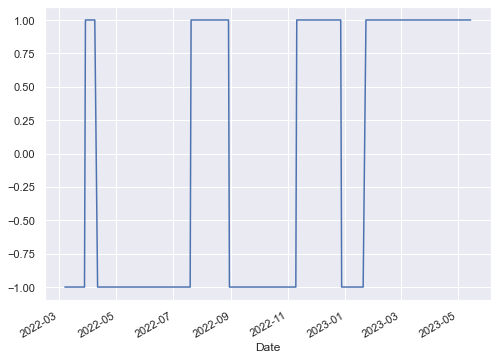

In [92]:
stock.position.dropna().plot()

stringIOBYTES = io.BytesIO()
plt.savefig(stringIOBYTES, format='jpg')
stringIOBYTES.seek(0)
Base64_jpgData = base64.b64encode(stringIOBYTES.read())
imageimage = str(Base64_jpgData)
pictureshortlong = "data:image/png;base64,"+imageimage[2:-1]

In [93]:
stock['strat_return'] = stock['returns'] * stock['position'].shift()

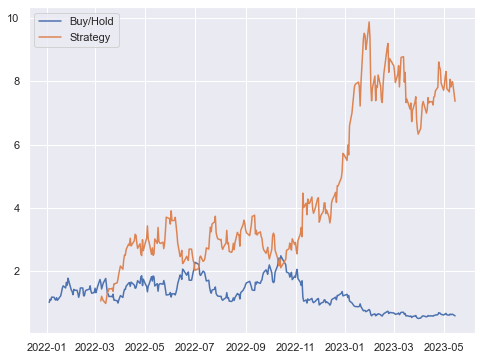

In [94]:
plt.plot(np.exp(stock['returns'].dropna()).cumprod(), label='Buy/Hold')
plt.plot(np.exp(stock['strat_return'].dropna()).cumprod(), label='Strategy')
plt.legend();

my_stringIObytes = io.BytesIO()
plt.savefig(my_stringIObytes, format='jpg')
my_stringIObytes.seek(0)
my_base64_jpgData = base64.b64encode(my_stringIObytes.read())
imageee = str(my_base64_jpgData)

In [95]:
picturereturn = "data:image/png;base64,"+imageee[2:-1]

In [96]:
print("buy and hold strategy return: ",np.exp(stock['returns'].dropna()).cumprod()[-1] -1)
print("mean reversion strategy return: ",np.exp(stock['strat_return'].dropna()).cumprod()[-1] - 1)

buy and hold strategy return:  -0.41149067348004664
mean reversion strategy return:  6.364312794328134


In [97]:
#scrap yahoo finance to have the price of the security
#take the 21 MA and percentile of the ratio
#do a calculation using math
#do an if statment and print function to return a buy of sell order
#send this print message to phone everyday, with the return of the strategy from the start of the process

In [98]:
# [Step 1] DATA SCRAPPING
# 1) url
url='https://finance.yahoo.com/quote/'+Ticker+'/'

# 2) requests.get()
page=requests.get(url)
page_text=page.text

# [Step 2] Parsing Data
soup=BeautifulSoup(page_text, 'html.parser')
price_now= soup.find_all(class_="Fw(b) Fz(36px) Mb(-4px) D(ib)")

for item in price_now:
    price_text=float(item.text.lstrip())
    
print(price_text)

21.37


In [99]:
#date for 21 MA using loc function = stock.loc['yyyy-mm-dd','ma']

y = stock.index
date= str(y[-1])
dateee = date[0:10]

twentyonema = float(stock.loc[dateee, 'ma'])
print(twentyonema)

20.238571439470565


In [101]:
#push safer
client = Client("") #put your own client ID
Ratio_today=price_text/twentyonema
print(Ratio_today)

if Ratio_today >= p[-1]:
    client.send_message("SELL "+Ticker+", go short","mean-reverse strat update",icon=49,picture1=picturereturn, picture2 = picturepercentile, picture3= pictureshortlong)
elif Ratio_today <= p[0]:
    client.send_message("BUY "+Ticker+", go long","mean-reverse strat update",icon=48,picture1=picturereturn, picture2 = picturepercentile, picture3= pictureshortlong)
    client.send
else:
    client.send_message("Keep position","mean-reverse strat update",icon=51,picture1=picturereturn, picture2= picturepercentile, picture3= pictureshortlong)

1.0559045663827265
